In [58]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [59]:
# データを読み込む
df = pd.read_csv('./data/feature/fuutou.csv')
df = df.drop('得意先コード', axis=1)

In [60]:
# クラスタリング
sc = StandardScaler() #データの標準化
clustering_sc = sc.fit_transform(df)
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(df)
df['cluster'] = clusters.labels_

In [61]:
# PCAでデータを2次元に削減する
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df['cluster'].values

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


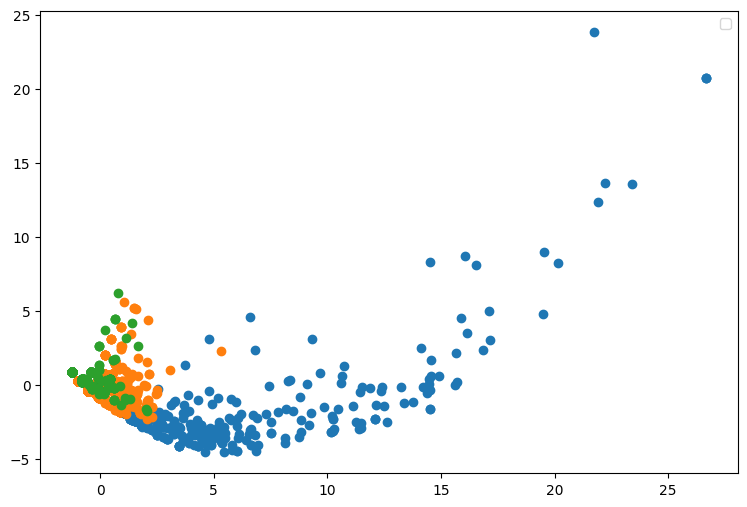

In [62]:
#プロット
fig = plt.figure(figsize = (9, 6))
for i in pca_df['cluster'].unique():
   tmp = pca_df.loc[pca_df['cluster']==i]
   plt.scatter(tmp[0],tmp[1])
   
# 各要素にDataFrameのインデックスの数字をラベルとして付ける
plt.legend()
plt.show()